## Importing the relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from arch import arch_model
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [53]:
raw_csv_data = pd.read_csv("JPM.US.csv") 
df_comp=raw_csv_data.copy()
df_comp.set_index("Date", inplace=True)

In [54]:
df_comp['market_value']=df_comp.Close
df_comp.tail()

,Open,High,Low,Close,Volume,market_value
Date,,,,,,
2021-09-02,160.02,161.6100,159.430,160.46,8815634.0,160.46
2021-09-03,160.39,160.8900,159.145,159.49,7961223.0,159.49
2021-09-07,159.99,161.3814,158.960,159.21,9290968.0,159.21
2021-09-08,158.89,159.5800,158.040,158.50,7852678.0,158.50
2021-09-09,158.27,160.8325,158.080,159.19,7904256.0,159.19


In [55]:
size = 252 #int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:-size], df_comp.iloc[-size:]

In [57]:
df_test

,Open,High,Low,Close,Volume,market_value
Date,,,,,,
2020-09-10,98.598,99.5900,96.886,97.071,16375437.0,97.071
2020-09-11,97.207,98.5580,96.836,98.276,14176195.0,98.276
2020-09-14,98.706,100.6000,98.568,99.640,19557988.0,99.640
2020-09-15,99.890,100.0000,96.400,96.536,24356220.0,96.536
2020-09-16,96.682,98.3350,96.030,96.944,19832440.0,96.944
...,...,...,...,...,...,...
2021-09-02,160.020,161.6100,159.430,160.460,8815634.0,160.460
2021-09-03,160.390,160.8900,159.145,159.490,7961223.0,159.490
2021-09-07,159.990,161.3814,158.960,159.210,9290968.0,159.210


In [58]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [59]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [60]:
df['returns'] = df.market_value.pct_change(1)*100
df['returns'].head()

Date
1970-01-02         NaN
1970-01-05    0.000000
1970-01-06    1.058446
1970-01-07    2.373312
1970-01-08   -0.258353
Name: returns, dtype: float64

## Creating Squared Returns

In [61]:
df['sq_returns'] = df.returns.mul(df.returns)

In [62]:
df['sq_returns'].head()

Date
1970-01-02         NaN
1970-01-05    0.000000
1970-01-06    1.120308
1970-01-07    5.632608
1970-01-08    0.066746
Name: sq_returns, dtype: float64

In [63]:
df.tail()

,Open,High,Low,Close,Volume,market_value,returns,sq_returns
Date,,,,,,,,
2020-09-02,97.187,99.119,96.809,98.844,14887179.0,98.844,1.511728,2.285322
2020-09-03,100.460,102.090,97.853,98.528,23943061.0,98.528,-0.319696,0.102205
2020-09-04,101.170,102.290,98.568,100.660,27073835.0,100.660,2.163852,4.682255
2020-09-08,100.130,100.710,96.730,97.157,22737104.0,97.157,-3.480032,12.110621
2020-09-09,98.010,98.884,96.809,98.079,13815918.0,98.079,0.948979,0.900562


## Returns vs Squared Returns

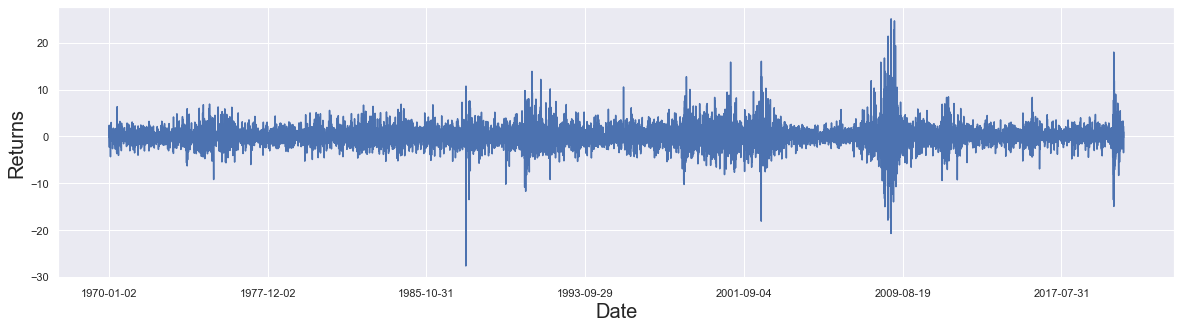

In [65]:
df.returns.plot(figsize=(20,5))
#plt.plot(figsize=(20,5))
#plt.gcf().autofmt_xdate()
#plt.title("Returns", size = 24)
plt.xlabel("Date", size=20)
plt.ylabel("Returns", size=20)

# Major ticks every 12 months.
# fmt_half_year = mdates.MonthLocator(interval=12)
# plt.xaxis.set_major_locator(fmt_half_year)

plt.show()

<AxesSubplot:xlabel='Date'>

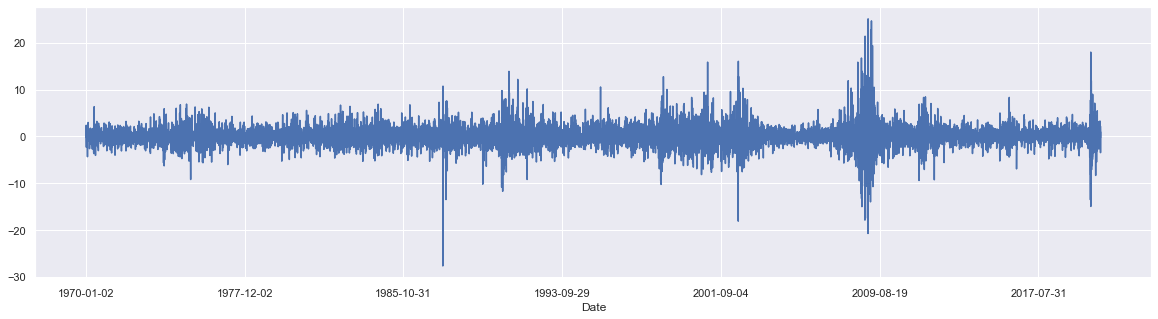

In [93]:
df['returns'].plot(figsize=(20,5))

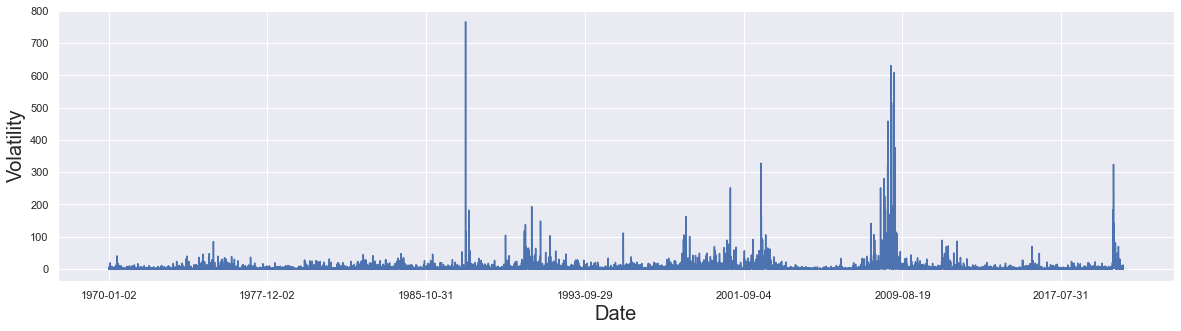

In [66]:
df.sq_returns.plot(figsize=(20,5))
#plt.title("Volatility", size = 24)
plt.xlabel("Date", size=20)
plt.ylabel("Volatility", size=20)
plt.show()

## The Simple GARCH Model

In [67]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 25156.91781158404
Iteration:     10,   Func. Count:     65,   Neg. LLF: 25136.859162271237
Optimization terminated successfully    (Exit mode 0)
            Current function value: 25136.85906181106
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25136.9
Distribution:                  Normal   AIC:                           50281.7
Method:            Maximum Likelihood   BIC:                           50311.5
                                        No. Observations:                12783
Date:                Fri, Sep 10 2021   Df Residuals:                    12782
Time:                        16:52:23   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0631  1.361e-02      4.636  3.559e-06 [3.642e-02,8.977e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0364  1.200e-02      3.036  2.394e-03 [1.291e-02,5.993e-02]
alpha[1]       0.0751  1.669e-02      4.498  6.857e-06   [4.236e-02,  0.108]
beta[1]        0.9179  1.744e-02     52.637      0.000     [  0.884,  0.952]
============================================================================

Covariance estimator: robust
"""

## Higher-Lag GARCH Models

In [68]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 25226.451706932035
Iteration:     10,   Func. Count:     75,   Neg. LLF: 25115.70403913589
Optimization terminated successfully    (Exit mode 0)
            Current function value: 25115.685568104367
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25115.7
Distribution:                  Normal   AIC:                           50241.4
Method:            Maximum Likelihood   BIC:                           50278.7
                                        No. Observations:                12783
Date:                Fri, Sep 10 2021   Df Residuals:                    12782
Time:                        16:52:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0626  1.364e-02      4.590  4.429e-06 [3.587e-02,8.934e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0507  1.524e-02      3.327  8.785e-04 [2.083e-02,8.058e-02]
alpha[1]       0.1068  2.296e-02      4.654  3.252e-06   [6.185e-02,  0.152]
beta[1]        0.3966      0.120      3.308  9.387e-04     [  0.162,  0.632]
beta[2]        0.4865      0.109      4.475  7.635e-06     [  0.273,  0.700]
============================================================================

Covariance estimator: robust
"""

In [69]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit()
results_garch_1_3.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 8069204766958.458
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1361497785.58681
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32716.976591809056
Iteration:      4,   Func. Count:     37,   Neg. LLF: 25376.19577273725
Iteration:      5,   Func. Count:     45,   Neg. LLF: 25740.172153978907
Iteration:      6,   Func. Count:     53,   Neg. LLF: 25200.4247197888
Iteration:      7,   Func. Count:     61,   Neg. LLF: 25116.20527883971
Iteration:      8,   Func. Count:     69,   Neg. LLF: 25124.306522560637
Iteration:      9,   Func. Count:     77,   Neg. LLF: 25108.88992232866
Iteration:     10,   Func. Count:     85,   Neg. LLF: 25103.40842635815
Iteration:     11,   Func. Count:     93,   Neg. LLF: 25104.819964938128
Iteration:     12,   Func. Count:    101,   Neg. LLF: 25103.100235719397
Iteration:     13,   Func. Count:    108,   Neg. LLF: 25103.09838166739
Iteration:     14,   Func. Count:    115,   Neg. LLF: 25103.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25103.1
Distribution:                  Normal   AIC:                           50218.2
Method:            Maximum Likelihood   BIC:                           50262.9
                                        No. Observations:                12783
Date:                Fri, Sep 10 2021   Df Residuals:                    12782
Time:                        16:52:25   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0604  1.338e-02      4.511  6.446e-06 [3.413e-02,8.657e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0558  1.689e-02      3.301  9.622e-04 [2.266e-02,8.887e-02]
alpha[1]       0.1213  2.754e-02      4.404  1.065e-05   [6.729e-02,  0.175]
beta[1]        0.4797      0.211      2.279  2.269e-02   [6.709e-02,  0.892]
beta[2]        0.0232      0.223      0.104      0.917     [ -0.415,  0.461]
beta[3]        0.3647  7.385e-02      4.939  7.864e-07     [  0.220,  0.509]
============================================================================

Covariance estimator: robust
"""

In [70]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 4)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     51,   Neg. LLF: 25212.361667369158
Iteration:     10,   Func. Count:     96,   Neg. LLF: 25102.824727206305
Iteration:     15,   Func. Count:    141,   Neg. LLF: 25095.67076766344
Optimization terminated successfully    (Exit mode 0)
            Current function value: 25095.667904201968
            Iterations: 17
            Function evaluations: 157
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25095.7
Distribution:                  Normal   AIC:                           50205.3
Method:            Maximum Likelihood   BIC:                           50257.5
                                        No. Observations:                12783
Date:                Fri, Sep 10 2021   Df Residuals:                    12782
Time:                        16:52:26   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0615  1.345e-02      4.575  4.768e-06 [3.517e-02,8.791e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0616  1.757e-02      3.509  4.506e-04 [2.721e-02,9.607e-02]
alpha[1]       0.1374  2.979e-02      4.611  4.006e-06   [7.898e-02,  0.196]
beta[1]        0.3886      0.150      2.592  9.533e-03   [9.479e-02,  0.682]
beta[2]        0.1579      0.144      1.098      0.272     [ -0.124,  0.440]
beta[3]        0.0221      0.212      0.104      0.917     [ -0.394,  0.438]
beta[4]        0.2819      0.103      2.737  6.209e-03   [8.000e-02,  0.484]
============================================================================

Covariance estimator: robust
"""

In [71]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 25157.879933824617
Iteration:     10,   Func. Count:     73,   Neg. LLF: 25139.66734461351
Iteration:     15,   Func. Count:    113,   Neg. LLF: 25148.4335218821
Optimization terminated successfully    (Exit mode 0)
            Current function value: 25136.85906372987
            Iterations: 17
            Function evaluations: 126
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25136.9
Distribution:                  Normal   AIC:                           50283.7
Method:            Maximum Likelihood   BIC:                           50321.0
                                        No. Observations:                12783
Date:                Fri, Sep 10 2021   Df Residuals:                    12782
Time:                        16:52:26   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0631  1.353e-02      4.663  3.114e-06 [3.657e-02,8.960e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0364  1.393e-02      2.614  8.938e-03  [9.116e-03,6.371e-02]
alpha[1]       0.0751  2.646e-02      2.837  4.555e-03    [2.320e-02,  0.127]
alpha[2]   1.9997e-10  2.990e-02  6.687e-09      1.000 [-5.861e-02,5.861e-02]
beta[1]        0.9179  2.016e-02     45.536      0.000      [  0.878,  0.957]
=============================================================================

Covariance estimator: robust
"""

In [72]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 25156.47882274782
Iteration:     10,   Func. Count:     86,   Neg. LLF: 25136.86036876885
Iteration:     15,   Func. Count:    139,   Neg. LLF: 25435.610622525437
Optimization terminated successfully    (Exit mode 0)
            Current function value: 25136.859063004515
            Iterations: 21
            Function evaluations: 177
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25136.9
Distribution:                  Normal   AIC:                           50285.7
Method:            Maximum Likelihood   BIC:                           50330.5
                                        No. Observations:                12783
Date:                Fri, Sep 10 2021   Df Residuals:                    12782
Time:                        16:52:27   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0631  1.362e-02      4.633  3.601e-06 [3.641e-02,8.979e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0364  2.031e-02      1.793  7.293e-02 [-3.386e-03,7.623e-02]
alpha[1]       0.0751  2.623e-02      2.862  4.205e-03    [2.367e-02,  0.126]
alpha[2]   4.8963e-10  3.126e-02  1.567e-08      1.000 [-6.126e-02,6.126e-02]
alpha[3]   5.8509e-10  2.763e-02  2.118e-08      1.000 [-5.414e-02,5.414e-02]
beta[1]        0.9179  3.110e-02     29.519 1.665e-191      [  0.857,  0.979]
=============================================================================

Covariance estimator: robust
"""

In [73]:
results_garch_1_3

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -25095.7
Distribution:                  Normal   AIC:                           50205.3
Method:            Maximum Likelihood   BIC:                           50257.5
                                        No. Observations:                12783
Date:                Fri, Sep 10 2021   Df Residuals:                    12782
Time:                        16:52:26   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0615  1.345e-02      4.575  4.768e-06 [3.

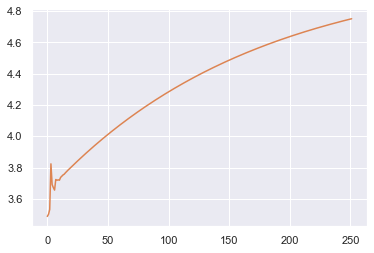

In [74]:
# forecast the test set
yhat = results_garch_1_3.forecast(horizon=len(df_test))
# plot the actual variance
var = [i*0.01 for i in range(0,)]
plt.plot(var[len(df_test):])
# plot forecast variance
plt.plot(yhat.variance.values[-1, :])
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error

In [89]:
results_garch_1_3.forecast(horizon=len(df_test))

In [78]:
forecasts = results_garch_1_3.forecast(horizon=len(df_test), reindex=False)
print(forecasts.residual_variance)

               h.001    h.002     h.003     h.004     h.005     h.006  \
Date                                                                    
2020-09-09  3.487782  3.50123  3.532324  3.823673  3.691042  3.671764   

               h.007     h.008     h.009    h.010  ...     h.243     h.244  \
Date                                               ...                       
2020-09-09  3.655895  3.723707  3.719049  3.72152  ...  4.733048  4.735061   

               h.245     h.246    h.247     h.248    h.249     h.250  \
Date                                                                   
2020-09-09  4.737063  4.739052  4.74103  4.742996  4.74495  4.746893   

               h.251     h.252  
Date                            
2020-09-09  4.748825  4.750745  

[1 rows x 252 columns]


In [80]:
res = pd.DataFrame(forecasts.residual_variance)

In [81]:
res

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.243,h.244,h.245,h.246,h.247,h.248,h.249,h.250,h.251,h.252
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-09,3.487782,3.50123,3.532324,3.823673,3.691042,3.671764,3.655895,3.723707,3.719049,3.72152,...,4.733048,4.735061,4.737063,4.739052,4.74103,4.742996,4.74495,4.746893,4.748825,4.750745


In [84]:
res = res.transpose()
res = res.values

In [85]:
res

array([[3.48778171, 3.50123003, 3.53232394, 3.82367349, 3.69104178,
        3.67176371, 3.65589463, 3.72370678, 3.7190491 , 3.72152   ,
        3.71911038, 3.73724738, 3.74514745, 3.75280919, 3.75780793,
        3.76693443, 3.77492022, 3.78283168, 3.78986451, 3.79756194,
        3.80514697, 3.81273742, 3.82007997, 3.82747788, 3.8348342 ,
        3.84217342, 3.84942843, 3.85665114, 3.86383145, 3.87097769,
        3.87807485, 3.88513079, 3.89214458, 3.89911901, 3.90605134,
        3.91294276, 3.91979326, 3.92660375, 3.93337397, 3.94010425,
        3.94679475, 3.95344585, 3.96005771, 3.96663057, 3.97316464,
        3.97966018, 3.9861174 , 3.99253654, 3.9989178 , 4.00526143,
        4.01156763, 4.01783664, 4.02406867, 4.03026393, 4.03642265,
        4.04254505, 4.04863132, 4.0546817 , 4.06069639, 4.06667559,
        4.07261953, 4.0785284 , 4.08440242, 4.09024179, 4.09604671,
        4.10181739, 4.10755404, 4.11325684, 4.118926  , 4.12456172,
        4.1301642 , 4.13573363, 4.14127021, 4.14

In [86]:
df_test

,Open,High,Low,Close,Volume,market_value
Date,,,,,,
2020-09-10,98.598,99.5900,96.886,97.071,16375437.0,97.071
2020-09-11,97.207,98.5580,96.836,98.276,14176195.0,98.276
2020-09-14,98.706,100.6000,98.568,99.640,19557988.0,99.640
2020-09-15,99.890,100.0000,96.400,96.536,24356220.0,96.536
2020-09-16,96.682,98.3350,96.030,96.944,19832440.0,96.944
...,...,...,...,...,...,...
2021-09-02,160.020,161.6100,159.430,160.460,8815634.0,160.460
2021-09-03,160.390,160.8900,159.145,159.490,7961223.0,159.490
2021-09-07,159.990,161.3814,158.960,159.210,9290968.0,159.210
